In [1]:
%matplotlib notebook
import numpy as np
import pickle
from glob import glob
from matplotlib import pyplot as plt
from matplotlib import cm
import scipy as sp
from astropy.io import fits

from donutlib.donututil import getZemaxWfm
from donutlib.decamutil import decaminfo
dinfo = decaminfo()

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [7]:
# convert txt files to fits, with just the pupil function
infodict = dinfo.infoDict
for ccdname in infodict.keys():
    
    xaxis,yaxis,data = getZemaxWfm("/Users/roodman/Astrophysics/Zemax/Decam/ZernikeMaps/decam-2012/wavefrontmaps/wavefrontmap_%s-fixed.txt" % (ccdname))
    pupil = np.where(data!=0,1.,0.)
    
    hdu = fits.PrimaryHDU(pupil)
    hdu.writeto('/Users/roodman/Astrophysics/Zemax/Decam/ZernikeMaps/decam-2012/wavefrontmaps/pupilfunction_%s.fits' % (ccdname))
    
    

<IPython.core.display.Javascript object>


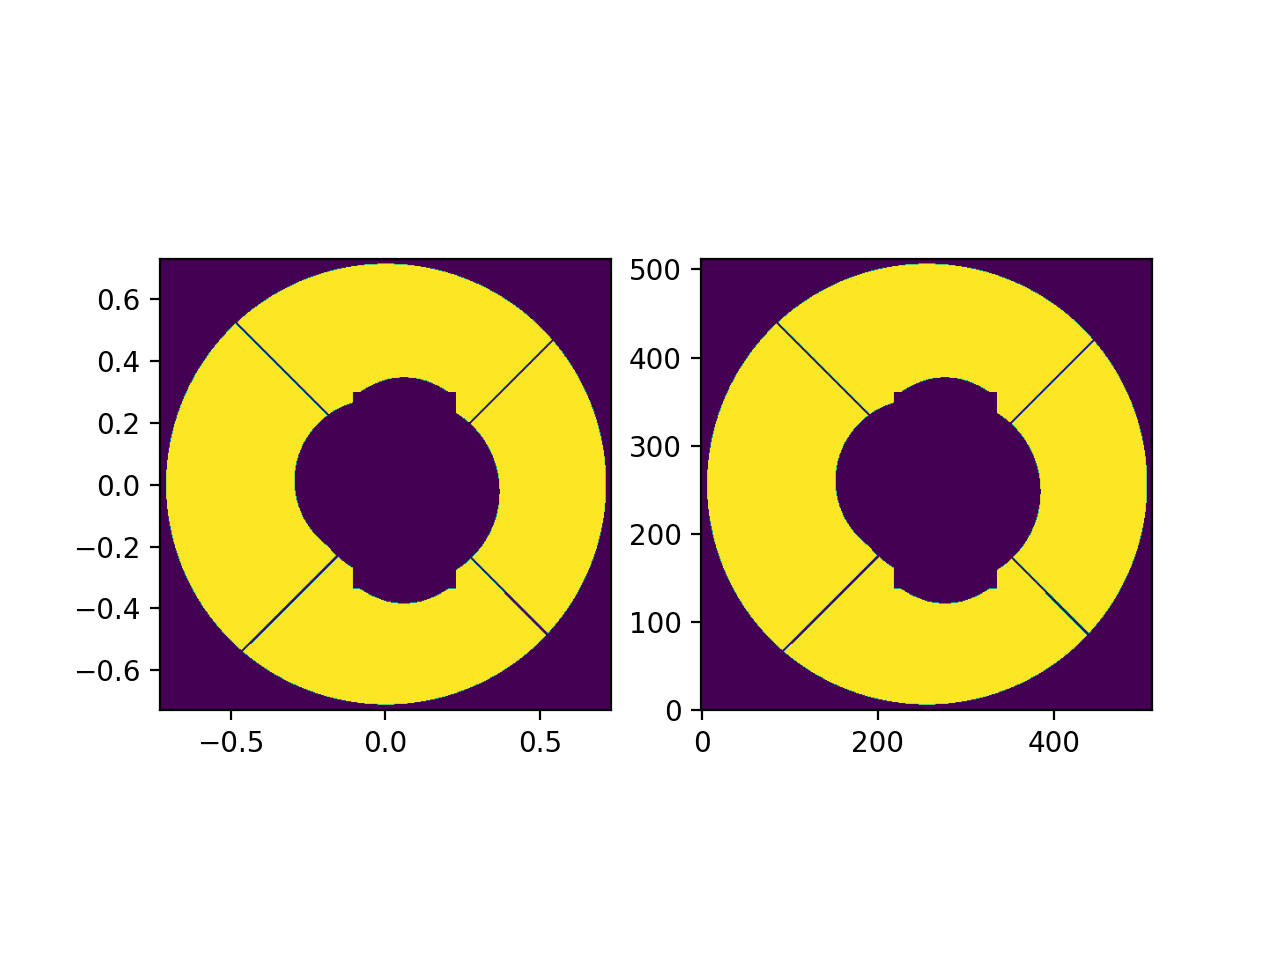

In [8]:
# check orientation of txt and fits files
ccdname = 'S29'
xaxis,yaxis,data = getZemaxWfm("/Users/roodman/Astrophysics/Zemax/Decam/ZernikeMaps/decam-2012/wavefrontmaps/wavefrontmap_%s-fixed.txt" % (ccdname))
f,ax = plt.subplots(1,2)
pupil = np.where(data!=0,1.,0.)
ax[0].imshow(pupil,origin='lower',extent=[np.min(xaxis),np.max(xaxis),np.min(yaxis),np.max(yaxis)])

hdu = fits.open("/Users/roodman/Astrophysics/Zemax/Decam/ZernikeMaps/decam-2012/wavefrontmaps/pupilfunction_%s.fits" % (ccdname))
ax[1].imshow(hdu[0].data,origin='lower')
